### Diabetes Prediction with MLP

Import Libraries

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
tf.__version__

'2.13.0'

### Data Processing

Import the Dataset

In [26]:
diabetes_df =  pd.read_csv('diabetes_prediction_dataset.csv')
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Show the Dataset Information

In [27]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Encoding Categorical Data

In [28]:
numeric_data = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_data = ['gender', 'smoking_history']

In [29]:
diabetes_df[categorical_data] = OrdinalEncoder().fit_transform(diabetes_df[categorical_data])
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,4.0,25.19,6.6,140,0
1,0.0,54.0,0,0,0.0,27.32,6.6,80,0
2,1.0,28.0,0,0,4.0,27.32,5.7,158,0
3,0.0,36.0,0,0,1.0,23.45,5.0,155,0
4,1.0,76.0,1,1,1.0,20.14,4.8,155,0


Split the Dataset into Training set and Testing set

In [30]:
X = diabetes_df.drop('diabetes', axis=1)
y = diabetes_df['diabetes']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'Size of training data: {X_train.shape}')
print(f'Size of testing  data: {X_test.shape}')

Size of training data: (80000, 8)
Size of testing  data: (20000, 8)


Feature Scaling

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building the Artificial Neural Network

Create the Artificial Neural Network

In [33]:
def build_model():

    model = Sequential()
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

### Training the Artificial Neural Network

Compiling the Model

In [34]:
model = build_model()

Train the Model

In [35]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2500/2500 [==============================] - 3s 859us/step - loss: 0.1128 - accuracy: 0.9613
Epoch 2/100
2500/2500 [==============================] - 2s 850us/step - loss: 0.0884 - accuracy: 0.9693
Epoch 3/100
2500/2500 [==============================] - 2s 843us/step - loss: 0.0848 - accuracy: 0.9706
Epoch 4/100
2500/2500 [==============================] - 2s 822us/step - loss: 0.0843 - accuracy: 0.9707
Epoch 5/100
2500/2500 [==============================] - 2s 815us/step - loss: 0.0839 - accuracy: 0.9706
Epoch 6/100
2500/2500 [==============================] - 2s 792us/step - loss: 0.0830 - accuracy: 0.9711
Epoch 7/100
2500/2500 [==============================] - 2s 796us/step - loss: 0.0826 - accuracy: 0.9715
Epoch 8/100
2500/2500 [==============================] - 2s 840us/step - loss: 0.0822 - accuracy: 0.9714
Epoch 9/100
2500/2500 [==============================] - 2s 874us/step - loss: 0.0827 - accuracy: 0.9713
Epoch 10/100
2500/2500 [==============================]

### Making Predictions and Evaluating the Model

Model Evaluation

In [36]:
model.evaluate(X_test, y_test, verbose=1)

625/625 [==============================] - 1s 657us/step - loss: 0.0981 - accuracy: 0.9700


[0.09812392294406891, 0.9700499773025513]

Predicting the Testing set Results

In [37]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

test_labels = np.squeeze(y_test)
predictions = np.squeeze(y_pred)

625/625 [==============================] - 0s 614us/step


In [38]:
df_result = pd.DataFrame({'Actual': test_labels, 'Prediction': predictions})
df_result.head()

,Actual,Prediction
3582,0,False
60498,0,False
53227,0,False
21333,0,False
3885,0,False


Making the Confusion Matrix

In [39]:
conf_matrix = confusion_matrix(df_result.iloc[:,0], df_result.iloc[:,1])
print(conf_matrix)

[[18211    86]
 [  513  1190]]


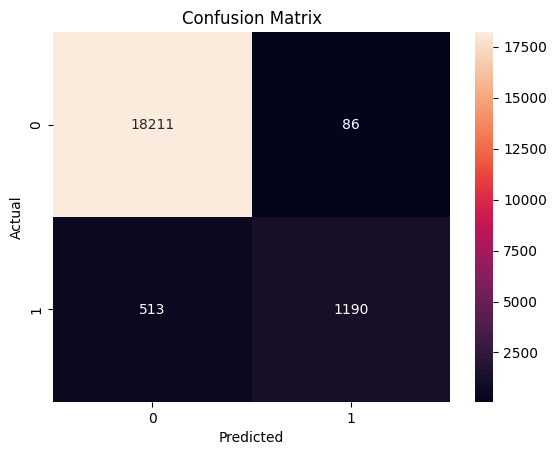

In [40]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy, Specificity, and Sensitivity of the Model

In [41]:
true_positive = conf_matrix[1,1] 
true_negative = conf_matrix[0,0]
false_positive  = conf_matrix[0,1]
false_negative = conf_matrix[1,0]

In [42]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Specificity: {true_negative/(true_negative+false_positive)}")
print(f"Sensitivity: {true_positive/(true_positive+false_negative)}")

Accuracy: 0.97005
Specificity: 0.9952997759195497
Sensitivity: 0.6987668819729889


Generate Classification Report

In [43]:
report = classification_report(df_result.iloc[:,0], df_result.iloc[:,1])
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.93      0.70      0.80      1703

    accuracy                           0.97     20000
   macro avg       0.95      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

